# Manim sandbox

(based on [https://hub.2i2c.mybinder.org/user/manimcommunity-jupyter_examples-yy4favq4/notebooks/First%20Steps%20with%20Manim.ipynb](https://hub.2i2c.mybinder.org/user/manimcommunity-jupyter_examples-yy4favq4/notebooks/First%20Steps%20with%20Manim.ipynb))

This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Some basic knowledge of Python is helpful! Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

> *Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

## Setup

Run the following code cell to set up your Manim code in subsequent cells.

In [1]:
# Set up Manim
import manim as mn
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

print(mn.__version__)

# Download alexaltair/manim-scripts repo so its files can be imported
import sys, pathlib, os
if not os.path.exists('manim-scripts'):
    !git clone -q https://github.com/alexaltair/manim-scripts.git
sys.path.append(str(pathlib.Path("manim-scripts")))

/usr/local/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


0.19.0


If you have executed the cell successfully, a message printing the installed version of the library should have appeared below it. (At time of writing, it's 0.19.0.) A warning about not finding ffmpeg may appear, but in my (Keenan's) experience, video generation works anyway.

## Example scene

Run the cell below to confirm that Manim rendering and video display are working.

In [2]:
%%manim -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

Manim Community v0.19.0

You can download a video by clicking the three dots at the bottom right, and selecting Download.

# Your Manim code here

**After running your Manim code, the generated images and videos will be shown inline, but your browser might or might not let you directly download from there. They're also available in the File Browser. Click the File icon at the top of the left sidebar, and navigate to /media/images/manim/ or /media/videos/manim/**

The example code below demos importing a file from the manim-scripts repo with the line `from entropy_and_optimization.optimization_config import *`

Manim Community v0.19.0

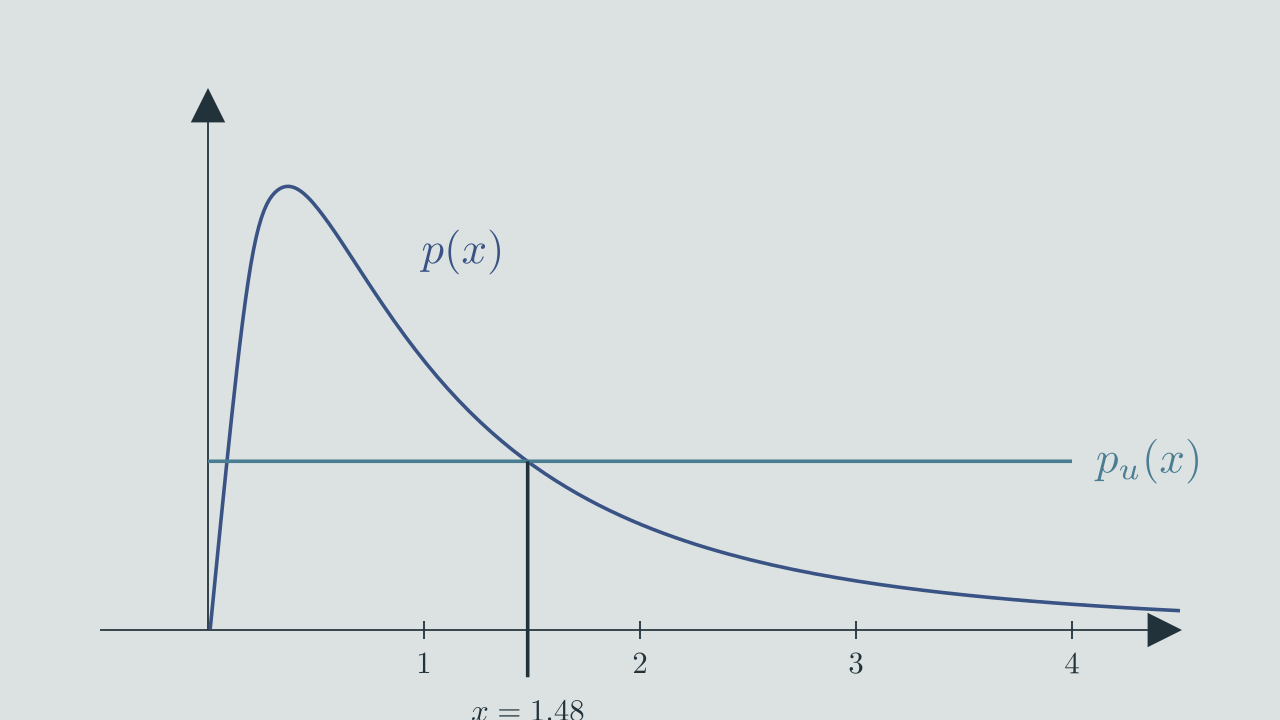

In [12]:
%%manim -qm UniformProb

import numpy as np

from entropy_and_optimization.optimization_config import *

config.pixel_height = 580

class UniformProb(Scene):
    def construct(self):
        x_axis_font_size = 33

        ax = Axes(
            x_range=[-0.5, 4.5],
            y_range=[0, 0.8],
            x_axis_config={
                "include_numbers": True,
                "font_size": x_axis_font_size,
            }
        )


        def lognormal(x, mu=0.0, sigma=1.0):
            # This is a base 10 log but it's just an arbitrary probability distribution
            return np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi))

        lognormal_curve = ax.plot(lambda x: lognormal(x), x_range=[0.01, 4.5], color=DARK_BLUE)
        lognormal_label = Tex('$p(x)$', color=lognormal_curve.color).shift(2*LEFT + 1.2*UP)

        uniform_dist = ax.plot(lambda x: 0.25, x_range=[0, 4], color=MEDIUM_BLUE)
        uniform_label = Tex('$p_u(x)$', color=uniform_dist.color).next_to(uniform_dist)


        intersection_x = 1.48
        intersection_point = [intersection_x, 0.25, 0]
        intersection_line = Line(
            start=ax.c2p(*intersection_point),
            end=ax.c2p(intersection_x, -0.07, 0),
        )
        intersection_label = Tex(f'$x = {intersection_x}$', font_size=x_axis_font_size).next_to(intersection_line, 1*DOWN)

        self.add(
            ax,
            lognormal_curve,
            lognormal_label,
            uniform_dist,
            uniform_label,
            intersection_line,
            intersection_label,
        )